In [1]:
#Dependencies
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Dr Wiabu\\aa-nacl-generated\\AA_NACL_NewFeatures_ManuellyRomoved.csv',dtype='float64')

In [6]:
aa = pd.read_csv('D:\\desktop files\\weka\\Datasets\\Dr Wiabu\\AA-NACL.csv',header=0,
                    names=['temp','conductivity','velocity','nacl','aa'],dtype='float64')

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Id                                          84 non-null     float64
 1   temp                                        84 non-null     float64
 2   velocity                                    84 non-null     float64
 3   vel-con                                     84 non-null     float64
 4   conductivity2.COUNT(concentration)          84 non-null     float64
 5   conductivity2.MAX(concentration.temp)       84 non-null     float64
 6   conductivity2.MAX(concentration.vel-con)    84 non-null     float64
 7   conductivity2.MAX(concentration.velocity)   84 non-null     float64
 8   conductivity2.MEAN(concentration.temp)      84 non-null     float64
 9   conductivity2.MEAN(concentration.vel-con)   84 non-null     float64
 10  conductivity2.ME

In [34]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          105 non-null    float32
 1   conductivity  105 non-null    float32
 2   velocity      105 non-null    float32
 3   nacl          105 non-null    float32
 4   aa            105 non-null    float32
dtypes: float32(5)
memory usage: 2.2 KB


In [41]:
#Changing pandas dataframe to numpy array
X = dataset
y = aa.iloc[0:84,3:5].values

In [42]:
y.shape

(84, 2)

In [50]:

from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



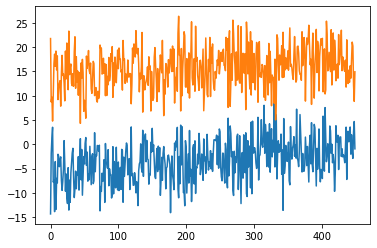

In [51]:
def create_data(n):
    x1 = array([i/100+uniform(-1,3) for i in range(n)]).reshape(n,1)
    x2 = array([i/100+uniform(-3,5)+2 for i in range(n)]).reshape(n,1)
    x3 = array([i/100+uniform(-6,5)-3 for i in range(n)]).reshape(n,1)

    y1= [x1[i]-x2[i]+x3[i]+uniform(-2,2) for i in range(n)]
    y2= [x1[i]+x2[i]-x3[i]+5+uniform(-1,3) for i in range(n)]
    X = hstack((x1, x2, x3))
    Y = hstack((y1, y2))
    return X, Y

# Now, we'll set n sample numbers and generate the dataset. We can visualize X or Y data in a plot.

X, Y = create_data(n=450)

plt.plot(Y)
plt.show()

In [52]:
in_dim = X.shape[1]
out_dim = Y.shape[1]


In [53]:
xtrain, xtest, ytrain, ytest=train_test_split(X, Y, test_size=0.15)


In [54]:
model = Sequential()
model.add(Dense(100, input_dim=in_dim, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
# model.compile(loss='mae', optimizer='adam')
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
 
model.summary()

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(6, activation='linear')
# ])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                3232      
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 3,698
Trainable params: 3,698
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=0)


In [56]:
ypred = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

y1 MSE:1.7882
y2 MSE:1.4493


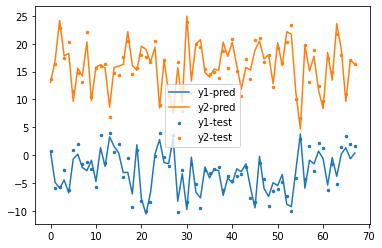

In [57]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, ytest[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# y = ohe.fit_transform(y).toarray()

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

### Succes we will use this as part of our model

In [120]:

# this is your initial model
model = Sequential()
model.add(Dense(20, input_dim=in_dim, init='uniform', activation=('tanh')))
# model.add(activation('tanh'))
model.add(Dense(10, init='uniform', activation=('softmax')))
model.add(Dense(out_dim))
# model.add(activation=('softmax'))

# we train it
model.compile(loss='mse', optimizer='sgd')
model.fit(xtrain, ytrain, nb_epoch=20, batch_size=16)

# we build a new model with the activations of the old model
# this model is truncated after the first layer
model2 = Sequential()
model2.add(Dense(20, weights=model.layers[0].get_weights(), activation=('tanh')))
# model2.add(activation=('tanh'))

Activations = model2.predict(xtrain)
# Note: I haven't tested it.

# Another way to do it would be to define a Theano function to get the layer's output:

# import theano
# from keras import backend as K
# get_activations = K.function([model.layers[0].input, K.learning_phase()], [model.layers[1].output(train=False), K.learning_phase()], allow_input_downcast=True)
# activations = get_activations(X_batch) # same result as above

C:\Program Data\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=3, activation="tanh", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Data\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="uniform")`
  """
C:\Program Data\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
382/382 [==============================] - 0s 880us/step - loss: 116.7621
Epoch 2/20
382/382 [==============================] - 0s 241us/step - loss: 63.2964
Epoch 3/20
382/382 [==============================] - 0s 275us/step - loss: 35.1929
Epoch 4/20
382/382 [==============================] - 0s 283us/step - loss: 23.7292
Epoch 5/20
382/382 [==============================] - 0s 346us/step - loss: 18.2510
Epoch 6/20
382/382 [==============================] - ETA: 0s - loss: 16.72 - 0s 262us/step - loss: 15.4401
Epoch 7/20
382/382 [==============================] - 0s 265us/step - loss: 13.7257
Epoch 8/20
382/382 [==============================] - 0s 270us/step - loss: 12.4800
Epoch 9/20
382/382 [==============================] - 0s 289us/step - loss: 11.5656
Epoch 10/20
382/382 [==============================] - 0s 351us/step - loss: 11.0278
Epoch 11/20
382/382 [==============================] - 0s 358us/step - loss: 10.3612
Epoch 12/20
382/382 [============================

In [131]:
ypredict = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypredict[:,0])) 
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypredict[:,1]))

y1 MSE:22.4062
y2 MSE:281.3868


In [129]:
Activations

array([[ 0.26858813, -0.41257435,  0.44268528, ...,  0.39089128,
        -0.3729118 , -0.41968575],
       [ 0.48362654, -0.52939445,  0.51652163, ...,  0.6457415 ,
        -0.7085936 , -0.6079792 ],
       [ 0.37492633, -0.52254844,  0.5539102 , ...,  0.5815753 ,
        -0.5726972 , -0.5909706 ],
       ...,
       [ 0.95096964,  0.05773449,  0.5492552 , ...,  0.7930721 ,
        -0.8665345 , -0.74853957],
       [ 0.9210666 ,  0.4044075 ,  0.22328016, ...,  0.43544525,
        -0.61616313, -0.3706976 ],
       [-0.17664243, -0.8463983 ,  0.73621935, ...,  0.74601996,
        -0.6774085 , -0.7639336 ]], dtype=float32)

In [128]:
model.layers[0].get_weights()

[array([[ 0.15103708, -0.00095557,  0.02823869,  0.00584122,  0.01894882,
         -0.15673557,  0.02401264, -0.02560018,  0.11549561,  0.12886314,
          0.01146426,  0.08233081,  0.11489226,  0.07617177, -0.09060785,
         -0.02766984,  0.02219292,  0.11663409, -0.16294605, -0.08660689],
        [-0.05347792, -0.13804336,  0.1080211 ,  0.06590576, -0.12508436,
          0.10844073,  0.14047475,  0.17019407, -0.11037309,  0.09531092,
          0.14356534,  0.13022625,  0.08964098, -0.13313095, -0.13385439,
         -0.12960266,  0.08253241,  0.1159291 , -0.07806719, -0.12620449],
        [ 0.23778512,  0.17394318, -0.03942171, -0.16087738,  0.19997092,
         -0.23504755, -0.07294131, -0.1311469 ,  0.23839436,  0.01006489,
         -0.11668755,  0.00052505, -0.04782978,  0.2291596 ,  0.0163558 ,
          0.1296412 , -0.15125628, -0.00810145, -0.02212354,  0.01613502]],
       dtype=float32),
 array([ 0.48094288,  0.46170145, -0.18210988, -0.19070773,  0.42491844,
        -0.4

In [85]:
from keras.models import Model

# this is your initial model
# model = Sequential()
# model.add(Dense(100, input_dim=in_dim, init='uniform', activation=('tanh')))
# # model.add(activation('tanh'))
# model.add(Dense(32, init='uniform', activation=('softmax')))
# model.add(Dense(out_dim))
# model.add(activation=('softmax'))
    #flatten 
dense1 = Dense(100, input_dim=in_dim, init='uniform', activation=('tanh'))
#     drop3 = Dropout(0.1)(dense1)
dense2 = Dense(Dense(32, init='uniform', activation=('softmax')))
dense3 = Dense(out_dim)
model = Model(inputs=in_dim, outputs=dense3)
#     return model
# we train it
model.compile(loss='mse', optimizer='sgd')
model.fit(xtrain, ytrain, nb_epoch=20, batch_size=16)

# we build a new model with the activations of the old model
# this model is truncated after the first layer
model2 = Sequential()
model2.add(Dense(20, weights=model.layers[0].get_weights(), activation=('tanh')))
# model2.add(activation=('tanh'))

Activations = model2._predict(X_batch)
# Note: I haven't tested it.

# Another way to do it would be to define a Theano function to get the layer's output:

import theano
from keras import backend as K
get_activations = K.function([model.layers[0].input, K.learning_phase()], [model.layers[1].output(train=False), K.learning_phase()], allow_input_downcast=True)
activations = get_activations(X_batch) # same result as above

C:\Program Data\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=3, activation="tanh", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Program Data\envs\Tensorflow\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="softmax", kernel_initializer="uniform")`
  del sys.path[0]


ValueError: Input tensors to a Model must come from `keras.layers.Input`. Received: 3 (missing previous layer metadata).